Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [2]:
df['gender'].value_counts(normalize=True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

##### 2. Какое количество уникальных значений у поля InternetService?

In [3]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [5]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [6]:
df.loc[df["PhoneService"] == "Yes", "PhoneService"] = 1
df.loc[df["PhoneService"] == "No", "PhoneService"] = 0

In [7]:
df['PhoneService'].value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [8]:
df.loc[df['TotalCharges'].isnull(), 'TotalCharges'] = np.nan
df['TotalCharges'] = df['TotalCharges'].astype('float32')

In [9]:
df.loc[df['TotalCharges'].isnull(), 'TotalCharges']

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float32

In [10]:
df['TotalCharges'].fillna(0, inplace=True)

In [11]:
# В силу того, что повились нулевые значения, вся статистика немного изменилась, и теперь min = 0.

df['TotalCharges'].describe()

count    7043.000000
mean     2279.734375
std      2266.794434
min         0.000000
25%       398.549988
50%      1394.550049
75%      3786.599976
max      8684.799805
Name: TotalCharges, dtype: float64

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [12]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [13]:
df.loc[df['Churn'] == "Yes", 'Churn'] = 1
df.loc[df['Churn'] == "No", 'Churn'] = 0
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [14]:
df = df.replace({'StreamingMovies':{'Yes':1, 'No':0, 'No internet service':0}, 'StreamingTV':
                 {'Yes':1, 'No':0, 'No internet service':0}, 'TechSupport':{'Yes':1, 'No':0, 'No internet service':0}})

##### 8. Заполните пропуски в поле PhoneService значением 0

In [15]:
df['Churn'].fillna(0, inplace=True)
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

#### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [16]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']

df = df[columns]
df.head(3)

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.850000,0,0,0,0
1,Male,34,1,1889.500000,0,0,0,0
2,Male,2,1,108.150002,0,0,0,1


##### 9. Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection. Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [17]:
from sklearn.model_selection import train_test_split

features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], random_state=0)

##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([('selector', ColumnSelector(key='gender')),('ohe', OHEEncoder(key='gender'))])

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [19]:
gen_FT = gender.fit_transform(X_train)
gen_FT.head()

,gender_Female,gender_Male
3296,1,0
6397,0,1
6043,0,1
5309,1,0
3000,0,1


##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

In [20]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([('selector', NumberSelector(key='tenure')),('standard', StandardScaler())])

# Нормирование полезно для приведения данных к общей шкале значений для возможности 
# дальнейшего сравнения и повышения точности работы модели. Также необходимо для корректной работы некоторых моделей.

##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [21]:
TTLch =  Pipeline([('selector', NumberSelector(key='TotalCharges')),('standard', StandardScaler())])

Объединение всех "кубиков" очень легко сделать таким образом

In [22]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [23]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TTLch),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(key=['PhoneService',
                                                                                      'StreamingMovies',
                                                                                      'StreamingTV',
                                                                                      'TechSupport']))])),
                                                ('gender',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(key='gender')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='gender'))]))])),
                ('classifier', RandomForestClassifier(random_state=42))])

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [25]:
preds = pipeline.predict_proba(X_test)
preds

array([[0.78, 0.22],
       [0.87, 0.13],
       [0.75, 0.25],
       ...,
       [1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ]])

##### 15. Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [26]:
from sklearn.metrics import roc_auc_score, log_loss

preds = preds[:,1]
auc = roc_auc_score(y_test, preds)
print('LogisticRegression: ROC AUC=%.3f' % (auc))

LogisticRegression: ROC AUC=0.779


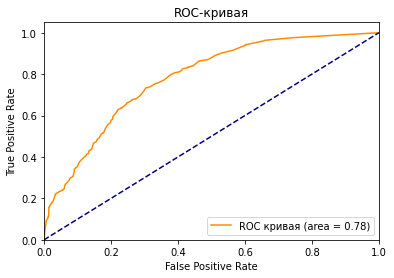

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

fpr, tpr, treshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [28]:
a = log_loss(y_test, preds)

print(f'Log_Loss: {a}')

Log_Loss: 0.8045207572786214


### Сохраним наш пайплайн

In [29]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)